# 에지 검출

### 배우기 전에 에지 검출 직접 해보기 (앞서 배운 내용들을 토대로 opencv 메서드 없이 해보는 것이 가능하다)
1. 이미지 바이너리 흑백으로 변환


In [9]:
import cv2

src = cv2.imread('img/namecard1.png', 0)
src[src[:]<210]=0
src[src[:]>0]=255

cv2.imshow('src', src)

cv2.waitKey(0)
cv2.destroyAllWindows()

2. np.diff() 사용(인접한 배열의 차를 구해주는 함수), 이미지 배열에서 차가 255 이상인 경우의 배열 생성

In [10]:
import numpy as np

edge = np.diff(src)
res1 = np.where(edge==255)
res2 = np.where(edge==1)

for i in range(0, len(res1[0])):
    cv2.circle(edge, (res1[1][i], res1[0][i]), 1, 128, 1)
    
for i in range(0, len(res2[0])):
    cv2.circle(edge, (res2[1][i], res2[0][i]), 1, 128, 1)

cv2.imshow('src', src)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
import cv2
import numpy as np

grayscale = cv2.imread('img/namecard1.png', 0)
grayscale[grayscale[:]<220]=0  #dtype:uint8
grayscale[grayscale[:]!=0]=255

#=>diff의 결과가 255 or 1
res = np.diff(grayscale)  # 양 옆 픽셀과의 차

#차가 255인 픽셀의 위치를 반환. 
#2개의 배열을 갖는 튜플반환.[0]은 y좌표들, [1]은 x좌표들
res1 = np.where(res==255)

#차가 -255(1)인 픽셀의 위치를 반환. 
#2개의 배열을 갖는 튜플반환.[0]은 y좌표들, [1]은 x좌표들
res2 = np.where(res==1)

#이미지, 중심점, 반지름,색상,두께
for i in range(0, len(res1[0])):
    cv2.circle(grayscale, (res1[1][i], res1[0][i]), 1, 128, 1)
    
for i in range(0, len(res2[0])):
    cv2.circle(grayscale, (res2[1][i], res2[0][i]), 1, 128, 1)

cv2.imshow('grayscale', grayscale)
cv2.waitKey(0)
cv2.destroyAllWindows()

* 에지(edge)  
영상에서 픽셀의 밝기 값이 급격하게 변하는 부분.   
객체 이미지 테두리  
  
* 에지 검출  
영상을 미분하여 값이 큰 영역 검출  
  
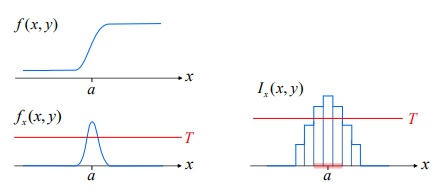  
  
* 영상에 사용되는 미분 근사화  
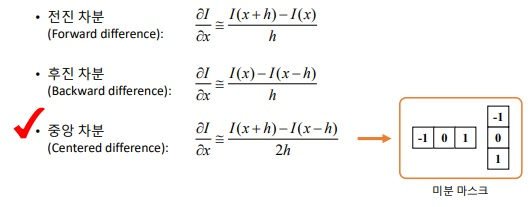  
  
* 미분 마스크  
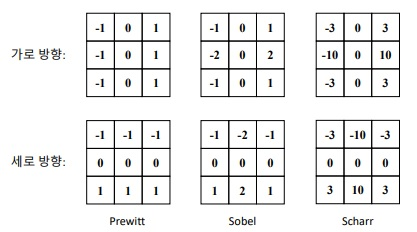  
  
<소벨 필터>  
cv2.Sobel(src, ddepth, dx, dy, ksize=None, scale=None, delta=None, borderType=None) => 결과 영상 반환  
  
  ddepth: 결과 영상 데이터 타입, -1이면 입력 영상과 동일.  
  dx: x방향 미분 차수  
  dy: y방향 미분 차수  
  ksize: 커널 크기. 보통 3  
  scale: 결과 영상에 추가로 곱할 값. 기본은 1.  
  delta: 결과 영상에 추가로 더할 값. 기본은 0.  

In [6]:
import numpy as np
import cv2

src = cv2.imread('c.jpg', cv2.IMREAD_GRAYSCALE)

dx = cv2.Sobel(src, -1, 1, 0, delta=128)
dy = cv2.Sobel(src, -1, 0, 1, delta=128)

cv2.imshow('src', src)
cv2.imshow('dx', dx)
cv2.imshow('dy', dy)
cv2.waitKey(0)

cv2.destroyAllWindows()

<샤르 필터>  
cv2.Scharr(src, ddepth, dx, dy, scale=None, delta=None, borderType=None) => 결과 영상 반환
  
ddepth: 결과 영상 데이터 타입, -1이면 입력 영상과 동일.  
dx: x방향 미분 차수  
dy: y방향 미분 차수  
scale: 결과 영상에 추가로 곱할 값. 기본은 1.  
delta: 결과 영상에 추가로 더할 값. 기본은 0.  

In [27]:
import numpy as np
import cv2

src = cv2.imread('c.jpg', cv2.IMREAD_GRAYSCALE)

dx = cv2.Scharr(src, -1, 1, 0, delta=128)
dy = cv2.Scharr(src, -1, 0, 1, delta=128)

cv2.imshow('src', src)
cv2.imshow('dx', dx)
cv2.imshow('dy', dy)
cv2.waitKey(0)

cv2.destroyAllWindows()

* 그래디언트(gradient)  
영상을 편미분하여 구한 벡터  
그래디언트 크기: 픽셀 값 차이 크기  
그래디언트 방향: 픽셀 값이 가장 급격하게 증가하는 방향  
  
크기 계산 함수  
cv2.magnitude(x, y) => 2D 벡터 크기 행렬 반환  
x: x축 미분값(실수형)  
y: y축 미분값(실수형)  

방향 계산 함수  
cv2.phase(x, y, angleInDegree=None) => angle  
x: x축 미분값(실수형)  
y: y축 미분값(실수형)  
angleInDegree: True이면 각도, False이면 래디언

In [7]:
import numpy as np
import cv2

src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

dx = cv2.Sobel(src, cv2.CV_32F, 1, 0)
dy = cv2.Sobel(src, cv2.CV_32F, 0, 1)

mag = cv2.magnitude(dx, dy)
mag = np.clip(mag, 0, 255).astype(np.uint8)

dst = np.zeros(src.shape[:2], np.uint8)
dst[mag > 128] = 255
#_, dst = cv2.threshold(mag, 120, 255, cv2.THRESH_BINARY)

cv2.imshow('src', src)
cv2.imshow('mag', mag)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

<케니 에지 검출>  
에지를 잘 검출하려면?  
정확한 검출: 점이나 노이즈를 에지로 찾거나 에지를 놓치는 확률 최소화  
정확한 위치: 에지 중심 검출  
단일 에지: 하나의 에지는 하나의 점으로 표현  
  
 * 케니 에지 검출 단계  
 가우시안 필터링: 잡음 제거  
 그래디언트 계산: 소벨 마스크를 이용해서 크기, 방향 계산  
 비최대 억제: 하나의 에지가 여러 개 픽셀로 표현되는 것을 막기 위해 그래디언트 크기가 국지적 최대인 픽셀만 선택  
 히스테리시스 에지 트래킹: 걸러진 에지 중에서 약한 에지는 버리고 강한 에지와 연결된 에지만 최종 선택  
  
케니 함수  
cv2.Canny(img, threshold1, threshold2, apertureSiz=None, L2gradient=None) => 에지 영상 반환  
threshold1 – Hysteresis Thredsholding 작업에서의 min 값  
threshold2 – Hysteresis Thredsholding 작업에서의 max 값 
apertureSiz - 소벨 연산에 사용할 커널 크기  
L2gradient - 그래디언트 계산 수식 지정. True, False(기본값)  
  
* 이진화 임계값 함수  
cv2.threashold(src, thresh, maxval, type) => (임계값, 이진화 영상)  
thresh: 이진화 임계값  
maxval: 임계값을 넘었을 때 적용할 value  
type: 이진화 종류 지정  
  
thresholding type  
cv2.THRESH_BINARY  
cv2.THRESH_BINARY_INV  
cv2.THRESH_TRUNC  
cv2.THRESH_TOZERO  
cv2.THRESH_TOZERO_INV  

In [8]:
import numpy as np
import cv2


src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.Canny(src, 50, 150)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

<허프 변환 직선 검출>  
직선의 방정식은  
y = ax + b  
이지만 y축과 평행한 수직선은 표현 못함. 그래서 이를 보완해 극좌표계 직선의 방정식 사용  
  
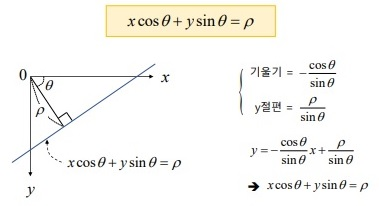  
  
위 방정식 파라메터 공간으로 변환   
  
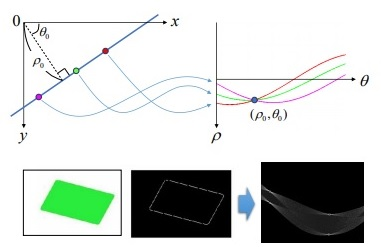  
  
* 허프 변환 함수  
cv2.HoughLines(img, rho, theta, threshold, srn=None, stn=None, min_theta=None, max_theta=None) => 직선 파라메터를 담은 행렬  
rho – r 값의 범위 (0 ~ 1 실수)  
theta – 𝜃 값의 범위(0 ~ 180 정수)  
threshold – 직선으로 판단할 임계값, 숫자가 작으면 많은 선이 검출되지만 정확도가 떨어지고, 숫자가 크면 정확도가 올라감.  
srn, stn - 멀티 스케일 허프 변환에서 rho, theta를 나누는 값. 기본은 0  
min_theta, max_theta - theta 최소, 최대값  
  
  
* cv2.HoughLines()함수의 단점  
반환된 모든 점에 기울기를 계산하여 시작점과 끝점을 계산해야 함. 그리고 모든 점에 대해서 연산하므로 속도가 느림. 이를 보완한 함수가 확율 허프 변환 함수다.  
  
  
* 확율 허프 변환  
이전 허프변환을 최적화 한 것.   
모든 점을 대상으로 하는 것이 아니라 임의의 점을 이용하여 직선을 찾는 것입니다. 단 임계값을 작게 해야함.  
장점은 선의 시작점과 끝점을 Return해주기 때문에 쉽게 화면에 표현할 수 있다.  
  
cv2.HoughLinesP(image, rho, theta, threshold, minLineLength, maxLineGap) => lines  
rho – r 값의 범위 (0 ~ 1 실수)  
theta – 𝜃 값의 범위(0 ~ 180 정수)  
threshold – 직선으로 판단할 임계값  
minLineLength - 검출할 선의 최소 길이  
maxLineGap - 직선으로 간주할 최대 에지 점 간격

In [15]:
import numpy as np
import cv2


src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(src, 50, 150)

lines = cv2.HoughLinesP(edges, 1, np.pi / 180., 160,
                        minLineLength=50, maxLineGap=5)

dst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

if lines is not None:
    for i in range(lines.shape[0]):
        pt1 = (lines[i][0][0], lines[i][0][1])  # 시작점 좌표
        pt2 = (lines[i][0][2], lines[i][0][3])  # 끝점 좌표
        cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


In [10]:
import numpy as np
import cv2


src = cv2.imread('img/namecard1.png', cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(src, 50, 150)

lines = cv2.HoughLinesP(edges, 1, np.pi / 180., 110,
                        minLineLength=170, maxLineGap=4)

dst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

if lines is not None:
    for i in range(lines.shape[0]):
        pt1 = (lines[i][0][0], lines[i][0][1])  # 시작점 좌표
        pt2 = (lines[i][0][2], lines[i][0][3])  # 끝점 좌표
        cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


* 허프 변환 원검출 함수  
cv2.HoughCircles(img, method, dp, minDist, param1=None, param2=None, minRadius=None, maxRadius=None) => 검출원 행렬 반환  
  
  method: cv2.HOUGH_GRADIENT 만 가능  
  dp: img와 축적배열 크기 비율. 1은 같음, 2는 축적배열이 img의 반  
  minDist: 검출된 원 중심점들의 최소 거리  
  param1: 케니 검출기의 높은 임계값   
  param2: 축적 배열의 원 검출을 위한 임계값  
  minRadius, maxRadius: 검출할 원의 최소, 최대 반지름  

In [33]:
import numpy as np
import cv2

src = cv2.imread('coins1.jpg')

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0, 0), 1.0)

circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50,
                           param1=150, param2=40, minRadius=20, maxRadius=80)
dst = src.copy()

if circles is not None:
    for i in range(circles.shape[1]):
        cx, cy, radius = circles[0][i]
        cv2.circle(dst, (int(cx), int(cy)), int(radius), (0, 0, 255), 2, cv2.LINE_AA)
        #cv2.circle(이미지, 중심점, 반지름,색상,두께), LINE_AA = 부드러운 커브를 위해 앤티 앨리어싱 된 선

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

In [34]:
import numpy as np
import cv2

src = cv2.imread('dial.jpg')

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0, 0), 1.0)

circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50,
                           param1=150, param2=40, minRadius=20, maxRadius=150)

dst = src.copy()

if circles is not None:
    for i in range(circles.shape[1]):
        cx, cy, radius = circles[0][i]
        cv2.circle(dst, (int(cx), int(cy)), int(radius), (0, 0, 255), 2, cv2.LINE_AA)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()